In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

purchaseData = pd.read_csv('Purchase_Logistic.csv')
X = purchaseData.iloc[:, [2, 3]].values
Y = purchaseData.iloc[:, 4].values

In [3]:
scaler=StandardScaler();
X=scaler.fit_transform(X)

Xtrain,Xtest,Ytrain,Ytest\
    = train_test_split(X,Y,test_size=0.25,random_state=0)
    
logr = LogisticRegression(random_state=0)
logr.fit(Xtrain,Ytrain)

Ypred=logr.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)

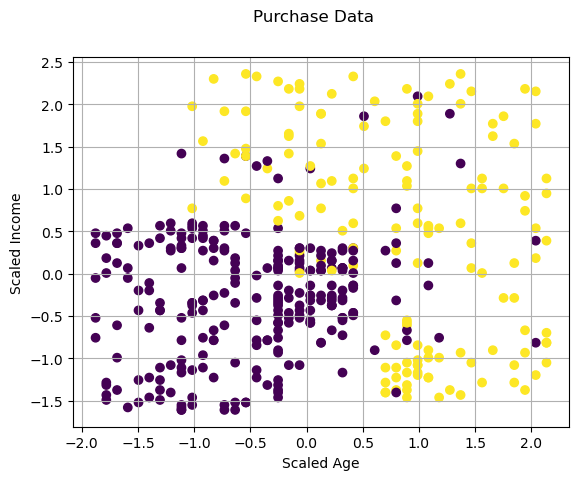

In [4]:
plt.figure(1);  
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

In [5]:
col = sigmoid(np.dot(X, np.transpose(logr.coef_)) + logr.intercept_) 
cf = logr.coef_;
xplot = np.arange(-1.0,1.2,0.01);
yplot = -(cf[0,0]*xplot + logr.intercept_)/cf[0,1]

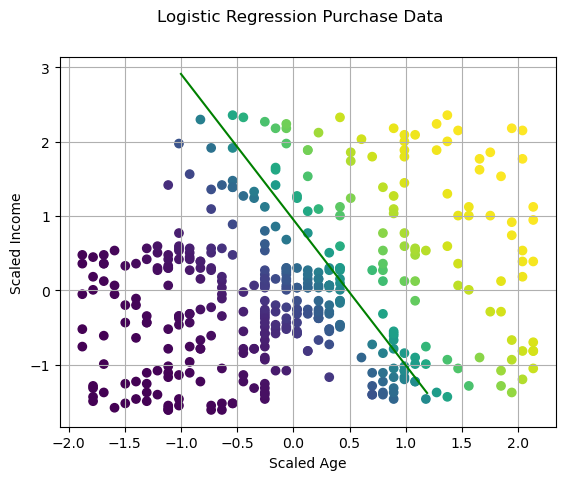

In [6]:
plt.figure(2);
plt.scatter(X[:, 0], X[:, 1], c = col)
plt.plot(xplot,yplot,'g')
plt.suptitle('Logistic Regression Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()